# Weather Analysis


In [34]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import sys
import random
from api_keys import api_key
from citipy import citipy

In [35]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create list to hold lat, lng and cities
lat_lngs = []
cities = []

#Create random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size= 1750)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1750)
lat_lngs = zip(lats, lngs)

# Match city name using citipy by lat_lngs
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# print city list        
# cities

['hermanus',
 'whitehorse',
 'rikitea',
 'albany',
 'butaritari',
 'cholan',
 'halalo',
 'mount isa',
 'de aar',
 'busselton',
 'narsaq',
 'berlevag',
 'mar del plata',
 'saint-philippe',
 'laguna',
 'ushuaia',
 'santa cruz',
 'bima',
 'broome',
 'punta arenas',
 'cape town',
 'arraial do cabo',
 'illoqqortoormiut',
 'bambous virieux',
 'teguise',
 'east london',
 'luanda',
 'tygda',
 'karaton',
 'barrow',
 'ahipara',
 'port alfred',
 'yellowknife',
 'saskylakh',
 'vostok',
 'carnarvon',
 'sayat',
 'pochutla',
 'bengkulu',
 'atuona',
 'tasiilaq',
 'hilo',
 'devonport',
 'norman wells',
 'puerto ayora',
 'saryozek',
 'yarkovo',
 'longyearbyen',
 'karratha',
 'rimouski',
 'codrington',
 'attawapiskat',
 'mataura',
 'clonakilty',
 'barkhan',
 'taolanaro',
 'bluff',
 'ribeira grande',
 'tukrah',
 'lazaro cardenas',
 'vysotsk',
 'umzimvubu',
 'tuatapere',
 'lanzhou',
 'svetlyy',
 'hithadhoo',
 'hobart',
 'flinders',
 'lagoa',
 'thompson',
 'palkaka',
 'suez',
 'hearst',
 'aquiraz',
 'lavren

In [56]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" 

# Create dataframe to store data
targetcity = []
country = []
temperature = []
latitude = []
longtitude = []
humidity = []
cloudiness = []
windspeed = []

# print(json.dumps(weatherdata, indent=4, sort_keys=True))
# Sample code to test data
# target_url = url + city
# weatherdata = requests.get(target_url).json()
# weatherdata

# For loop to go through city list and grab data from API source
citycount = 1
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------------") 
for city in cities:
    target_url = url + city.replace(" ","+")
    weatherdata = requests.get(target_url).json()
    if weatherdata.get("id"):
        print("---------------------------------------------")
        print("City #", len(targetcity)+1, " :", weatherdata['name'])
        targetcity.append(weatherdata['name'])
        country.append(weatherdata['sys']['country'])
        temperature.append(weatherdata['main']['temp'])
        latitude.append(weatherdata['coord']['lat'])
        longtitude.append(weatherdata['coord']['lon'])
        humidity.append(weatherdata['main']['humidity'])
        cloudiness.append(weatherdata['clouds']['all'])
        windspeed.append(weatherdata['wind']['speed'])
    else:
        print("---------------------------------------------")
        print(f"No record found for City - " + city)
        citycount += 1
print("---------------------------------------------")
print("End of list")
        
# citycount = 1

#     print(json.dumps(weatherdata, indent=4, sort_keys=True))
# for city in cities:
#     target_url = url + city.replace(" ","+")
#     weatherdata = requests.get(target_url).json()
#     if weatherdata['cod'] == "404":
#         print("---------------------------------------------")
#         print("Issue with city record. Skipping record.")
#     elif weatherdata['cod'] == "500":
#         print("---------------------------------------------")
#         print("Issue with city record. Skipping record.")
#     else:
#         targetcity.append(weatherdata['name'])
#         country.append(weatherdata['sys']['country'])
#         temperature.append(weatherdata['main']['temp'])
#         latitude.append(weatherdata['coord']['lat'])
#         longtitude.append(weatherdata['coord']['lon'])
#         humidity.append(weatherdata['main']['humidity'])
#         cloudiness.append(weatherdata['clouds']['all'])
#         windspeed.append(weatherdata['wind']['speed'])
        
#         print("---------------------------------------------")
#         print("Processing: City - ", len(targetcity)+1, weatherdata['name'])
#         citycount += 1

    

Begin API Call to OpenWeather Database 
---------------------------------------------
---------------------------------------------
City # 0  : Hermanus
---------------------------------------------
City # 1  : Whitehorse
---------------------------------------------
City # 2  : Rikitea
---------------------------------------------
City # 3  : Albany
---------------------------------------------
City # 4  : Butaritari
---------------------------------------------
No record found for City - cholan
---------------------------------------------
No record found for City - halalo
---------------------------------------------
City # 5  : Mount Isa
---------------------------------------------
City # 6  : De Aar
---------------------------------------------
City # 7  : Busselton
---------------------------------------------
City # 8  : Narsaq
---------------------------------------------
City # 9  : Berlevag
---------------------------------------------
City # 10  : Mar del Plata
------------

In [61]:
# Create dataframe to store data
weather_data = pd.DataFrame({"City":targetcity,
                            "Country":country,
                            "Temperature (F)":temperature,
                            "Latitude":latitude,
                            "Longtitude":longtitude,
                            "Humidity (%)":humidity,
                            "Cloudiness (%)":cloudiness,
                            "Wind Speed (mph)":windspeed})

# re-organize table and print sample
weather_data = weather_data.loc[:,["City","Country","Temperature (F)","Latitude","Longtitude","Humidity (%)","Cloudiness (%)","Wind Speed (mph)"]]
weather_data.head()

,City,Country,Temperature (F),Latitude,Longtitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Hermanus,ZA,41.35,-34.42,19.24,91,76,3.38
1,Whitehorse,CA,77.00,60.72,-135.06,31,75,12.75
2,Rikitea,PF,73.70,-23.12,-134.97,100,92,7.96
3,Albany,US,66.11,42.65,-73.75,73,75,8.05
4,Butaritari,KI,83.06,3.07,172.79,100,56,1.36


In [64]:
# Create csv file output with data table
weather_data.to_csv("WeatherOutput.csv", index=False)
    

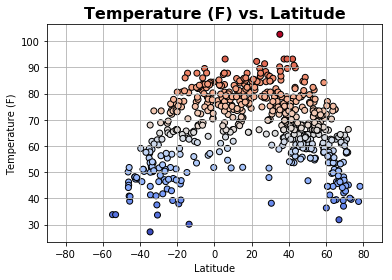

In [99]:
# Build scatterplot for Temperature (F) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Temperature (F)"], c=weather_data["Temperature (F)"], cmap = "coolwarm", edgecolor="black")

plt.title("Temperature (F) vs. Latitude", fontsize = 16, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-90,90)

plt.grid()
plt.savefig("Temperature (F) vs. Latitude.png")
plt.show()


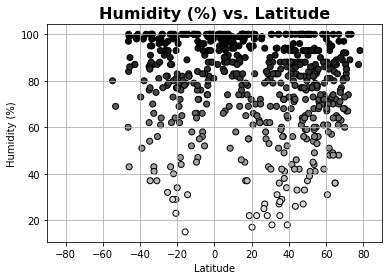

In [100]:
# Build scatterplot for Humidity (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], c=weather_data["Humidity (%)"], cmap = "binary", edgecolor="black")

plt.title("Humidity (%) vs. Latitude", fontsize = 16, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90,90)

plt.grid()
plt.savefig(" (%) vs. Latitude.png")
plt.show()



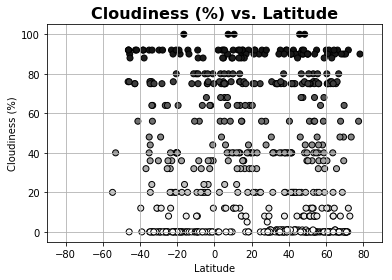

In [102]:
# Build scatterplot for Cloudiness (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], c = weather_data["Cloudiness (%)"], cmap = "binary", edgecolor="black")

plt.title("Cloudiness (%) vs. Latitude", fontsize = 16, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90,90)

plt.grid()
plt.savefig("Cloudiness (%) vs. Latitude.png")
plt.show()


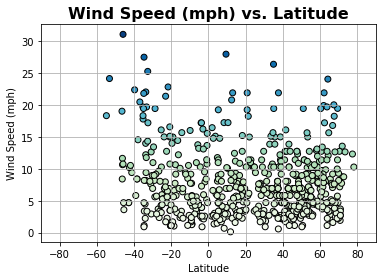

In [104]:
# Build scatterplot for Wind Speed (mph) vs. Latitude

plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (mph)"], c = weather_data["Wind Speed (mph)"], cmap = "GnBu", edgecolor="black" )

plt.title("Wind Speed (mph) vs. Latitude", fontsize = 16, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90,90)

plt.grid()
plt.savefig("Wind Speed (mph) vs. Latitude.png")
plt.show()